# Machine Learning Engineer Nanodegree

## Model Evaluation & Validation

## Project: Predicting Boston Housing Prices

> This notebook is a near-copy of the original notebook for the Machine Learning Engineer Nanodegree. This is for my own personal use, and for the purpose of learning the materials. Some of the materials may seemed copied, but interpreted in my own words.

## Getting Started

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

In [2]:
import cupy as cp
import cudf

In [3]:
%matplotlib inline

In [14]:
# data = cudf.read_csv("model_data/housing.csv", index=False)
data = pd.read_csv("model_data/housing.csv")

In [15]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [16]:
# df = data.head().to_pandas()

In [17]:
# prices = df["MEDV"]
prices = data["MEDV"]

In [18]:
prices.head()

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

In [19]:
# features = df.drop("MEDV", axis=1)
features = data.drop("MEDV", axis=1)

In [20]:
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [21]:
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [22]:
# @TODO Calculate the minimum, maximum, mean, median, and standard deviation of the prices of the data
minimum_price = np.min(prices)
# minimum_price = prices.min()

maximum_price = np.max(prices)
# maximum_price = prices.max()

mean_price = np.mean(prices)
# mean_price = prices.mean()

median_price = np.median(prices)
# median_price = prices.median()

std_price = np.std(prices)
# std_price = prices.std(ddof=0)

first_quartile = np.percentile(prices, 25)
third_quartile = np.percentile(prices, 75)
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))
print("First quartile of prices: ${:,.2f}".format(first_quartile))
print("Second quartile of prices: ${:,.2f}".format(third_quartile))
print("Interquartile (IQR) of prices: ${:,.2f}".format(inter_quartile))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13
First quartile of prices: $350,700.00
Second quartile of prices: $518,700.00
Interquartile (IQR) of prices: $168,000.00


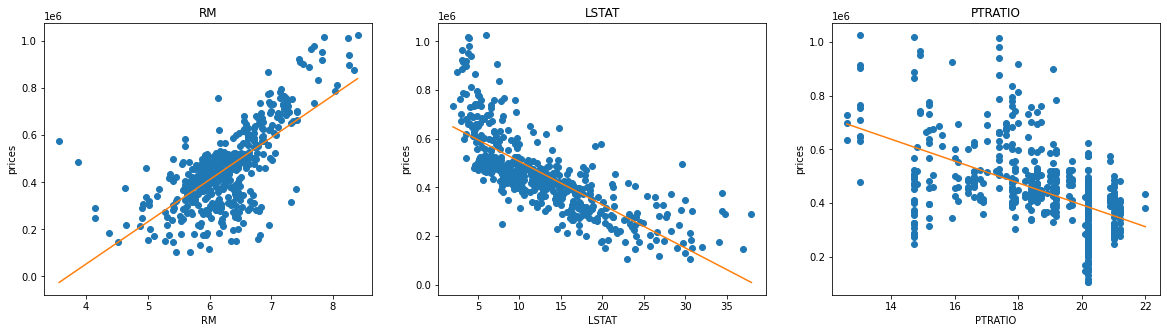

In [23]:
import matplotlib.pyplot as pl

pl.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    pl.subplot(1, 3, i+1)
    x = data[col]
    y = prices
    pl.plot(x, y, 'o')
    # Create regression line
    pl.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    pl.title(col)
    pl.xlabel(col)
    pl.ylabel('prices')

In [24]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

In [27]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [42]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

print("Training and testing split was successful.")

TypeError: X needs to be either a cuDF DataFrame, Series or                             a cuda_array_interface compliant array.